In [1]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls /content/drive/MyDrive/

 123EI0597_Verilog_Code.gdoc
 123EI0597_Verilog_Output.gdoc
 123ei0642_management_aiche.pdf
 123EI0642_Verilog_Code.gdoc
 123EI0642_Verilog_Output.gdoc
 17463734189892006053592595706371.jpg
'3 persons room 8-11 aug.gdoc'
 Abstract.gdoc
'Acting Prompts.gdoc'
'AI-ML Project Info..gdoc'
'AI ML Syllabus.gdoc'
 bee36445-79b8-437f-bb57-8342f12874bb_1740405477%20-%2089.00%20To%20CODTECH%20IT%20SOLUTIONS%20on%20Google%20Pay.png
 c082a9c4a9154552a03a7ea937f68953.pdf
'CEC Poster Details.gdoc'
 Characters.gdoc
'Colab Notebooks'
'Confirmation of Guest House Booking (1).docx'
'Confirmation of Guest House Booking (2).docx'
'Confirmation of Guest House Booking.docx'
'Confirmation of Guest House Booking.gdoc'
'Copy of Copy of matlab09_exp08.gdoc'
'Copy of matlab06_exp05.gdoc'
'Copy of matlab07_exp06.gdoc'
'Copy of matlab09_exp08 (1).gdoc'
'Copy of matlab09_exp08.gdoc'
'copy of sl 71-75.gdoc'
'DC generator.gdoc'
"Diwali Party '24"
 DOC-20250305-WA0012..pdf
 DOC-20250420-WA0010..pdf
'DSA Codes.gdoc'
'ea

In [4]:
# Install PyTorch geometric dependencies
!pip install -q torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-2.0.0+cu118.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.5/886.5 kB 30.9 MB/s eta 0:00:00


Loading data...
Data loaded.
Found 8 classes: ['fist' 'five' 'none' 'okay' 'peace' 'rad' 'straight' 'thumbs']
Dataset shapes (Images, Labels):
Train:      (8089, 64, 64, 3), (8089,)
Test:       (4010, 64, 64, 3), (4010,)
Validation: (3999, 64, 64, 3), (3999,)
Instantiating CNN feature extractor...
Creating graph datasets...
Graph datasets created.
Starting training...


/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 1/50, Train Loss: 1.6627, Train Accuracy: 0.3019
Epoch 1/50, Val Loss: 1.4608, Val Accuracy: 0.4184
Epoch 2/50, Train Loss: 1.1408, Train Accuracy: 0.5211
Epoch 2/50, Val Loss: 1.2383, Val Accuracy: 0.4871
Epoch 3/50, Train Loss: 0.9849, Train Accuracy: 0.5943
Epoch 3/50, Val Loss: 1.1411, Val Accuracy: 0.5306
Epoch 4/50, Train Loss: 0.8486, Train Accuracy: 0.6441
Epoch 4/50, Val Loss: 0.9554, Val Accuracy: 0.6034
Epoch 5/50, Train Loss: 0.7381, Train Accuracy: 0.6882
Epoch 5/50, Val Loss: 0.8028, Val Accuracy: 0.6729
Epoch 6/50, Train Loss: 0.6437, Train Accuracy: 0.7312
Epoch 6/50, Val Loss: 0.7151, Val Accuracy: 0.6929
Epoch 7/50, Train Loss: 0.5739, Train Accuracy: 0.7665
Epoch 7/50, Val Loss: 0.7211, Val Accuracy: 0.7302
Epoch 8/50, Train Loss: 0.4992, Train Accuracy: 0.7999
Epoch 8/50, Val Loss: 0.5662, Val Accuracy: 0.7782
Epoch 9/50, Train Loss: 0.4867, Train Accuracy: 0.8065
Epoch 9/50, Val Loss: 0.6698, Val Accuracy: 0.7412
Epoch 10/50, Train Loss: 0.4293, Train Accurac

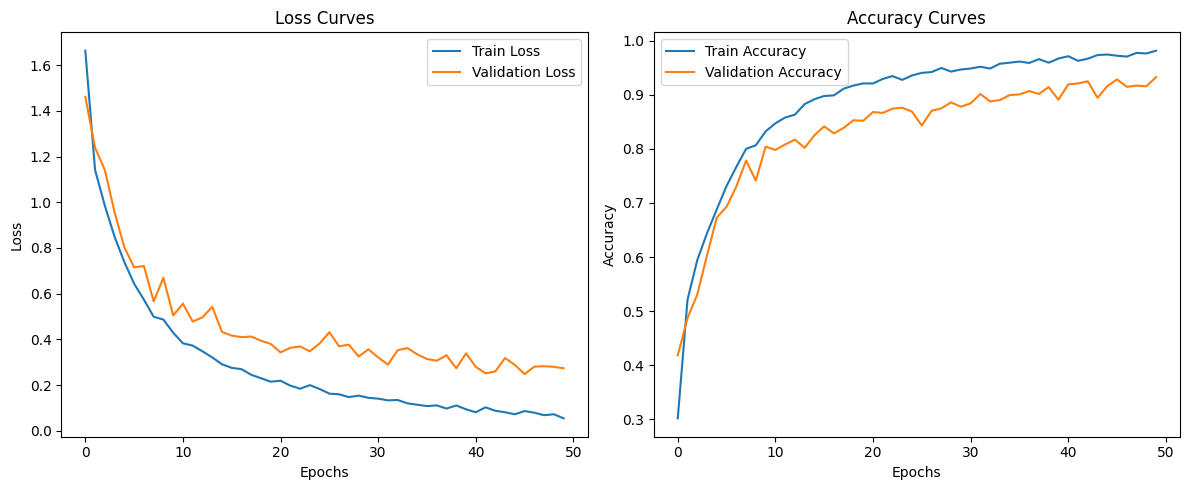

Evaluating on Test Set...
Final Test Loss: 0.3065, Final Test Accuracy: 0.9242


In [10]:
# !pip install torch-geometric scikit-image scikit-learn Pillow numpy matplotlib torch torchvision

import numpy as np
import matplotlib.pyplot as plt
from skimage.util import view_as_blocks
from torchvision import datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import LabelEncoder

import os
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, Dataset, DataLoader
from torch_geometric.nn import GATConv, global_mean_pool, TopKPooling
from torch_geometric.utils import dense_to_sparse

# --- Configuration ---
data_dir = '/content/drive/MyDrive/Hand_Gesture_Dataset'
img_h, img_w = 64, 64
img_size = (img_h, img_w)
patch_h, patch_w = 8, 8
num_patches_h = img_h // patch_h
num_patches_w = img_w // patch_w
num_patches = num_patches_h * num_patches_w
cnn_feature_dim = 64

# --- CNN Feature Extractor ---
class PatchFeatureExtractor(nn.Module):
    def __init__(self, input_channels=3, feature_dim=64):
        super().__init__()
        self.conv1 = nn.Conv2d(input_channels, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(32 * (patch_h // 4) * (patch_w // 4), feature_dim)
        self.relu3 = nn.ReLU()

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.relu3(self.fc(x))
        return x

# --- Data Loading ---
def load_data(directory):
    images, labels = [], []
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for filename in os.listdir(class_dir):
                try:
                    img_path = os.path.join(class_dir, filename)
                    img = Image.open(img_path).convert('RGB')
                    img = img.resize(img_size)
                    img = np.array(img)
                    if img.shape == (img_h, img_w, 3):
                        images.append(img)
                        labels.append(class_name)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

print("Loading data...")
train_images, train_labels = load_data(os.path.join(data_dir, 'train'))
test_images, test_labels = load_data(os.path.join(data_dir, 'test'))
validation_images, validation_labels = load_data(os.path.join(data_dir, 'validation'))
print("Data loaded.")

if len(train_images) == 0 or len(test_images) == 0 or len(validation_images) == 0:
    raise ValueError("Data loading failed. Check `data_dir` and dataset structure.")

le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
test_labels = le.transform(test_labels)
validation_labels = le.transform(validation_labels)
num_classes = len(le.classes_)
print(f"Found {num_classes} classes: {le.classes_}")

print("Dataset shapes (Images, Labels):")
print(f"Train:      {train_images.shape}, {train_labels.shape}")
print(f"Test:       {test_images.shape}, {test_labels.shape}")
print(f"Validation: {validation_images.shape}, {validation_labels.shape}")

# --- Image to Patch-Graph Conversion ---
def create_grid_adjacency(grid_h, grid_w, device):
    num_nodes = grid_h * grid_w
    adj = torch.zeros((num_nodes, num_nodes), dtype=torch.long, device=device)
    for r in range(grid_h):
        for c in range(grid_w):
            idx = r * grid_w + c
            for dr in [-1, 0, 1]:
                for dc in [-1, 0, 1]:
                    if dr == 0 and dc == 0:
                        continue
                    nr, nc = r + dr, c + dc
                    if 0 <= nr < grid_h and 0 <= nc < grid_w:
                        n_idx = nr * grid_w + nc
                        adj[idx, n_idx] = 1
    edge_index = dense_to_sparse(adj)[0]
    return edge_index

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
grid_edge_index = create_grid_adjacency(num_patches_h, num_patches_w, device='cpu')

def process_image_patch_cnn(image, label, cnn_model, patch_h, patch_w, grid_edge_index, device):
    image = image / 255.0
    image = image.astype(np.float32)
    patches = view_as_blocks(image, block_shape=(patch_h, patch_w, 3))
    patches = patches.reshape(-1, patch_h, patch_w, 3)
    if patches.shape[0] != num_patches:
        return None

    cnn_model.eval()
    patch_features_list = []
    with torch.no_grad():
        for patch in patches:
            patch_tensor = torch.from_numpy(patch).permute(2, 0, 1).unsqueeze(0).to(device)
            feature = cnn_model(patch_tensor)
            patch_features_list.append(feature)

    node_features = torch.cat(patch_features_list, dim=0).cpu()
    data = Data(x=node_features,
                edge_index=grid_edge_index.clone(),
                y=torch.tensor([label], dtype=torch.long))
    return data

print("Instantiating CNN feature extractor...")
cnn_model = PatchFeatureExtractor(input_channels=3, feature_dim=cnn_feature_dim).to(device)

def create_graph_list(images, labels, cnn_model, ph, pw, edge_idx, dev):
    graph_list = []
    for i in range(len(labels)):
        data = process_image_patch_cnn(images[i], labels[i], cnn_model, ph, pw, edge_idx, dev)
        if data:
            graph_list.append(data)
    return graph_list

print("Creating graph datasets...")
train_graph_data_list = create_graph_list(train_images, train_labels, cnn_model, patch_h, patch_w, grid_edge_index, device)
test_graph_data_list = create_graph_list(test_images, test_labels, cnn_model, patch_h, patch_w, grid_edge_index, device)
validation_graph_data_list = create_graph_list(validation_images, validation_labels, cnn_model, patch_h, patch_w, grid_edge_index, device)
print("Graph datasets created.")

if not train_graph_data_list or not test_graph_data_list or not validation_graph_data_list:
    raise ValueError("Graph dataset creation failed for one or more sets.")

# --- GNN Model Definition ---
class H_GAT_TopK_Deep(torch.nn.Module):
    def __init__(self, num_node_features, num_classes, heads=8, pool_ratio=0.5):
        super().__init__()
        self.gat1 = GATConv(num_node_features, 16, heads=heads)
        self.gat2 = GATConv(16 * heads, 32, heads=heads)
        self.pool1 = TopKPooling(32 * heads, ratio=pool_ratio)

        self.gat3 = GATConv(32 * heads, 64, heads=heads)
        # Fix: Initialize pool2 with the correct input feature dimension from gat3 output
        # The output dimension of gat3 is 64 * heads
        self.pool2 = TopKPooling(64 * heads, ratio=pool_ratio) # Changed from 64 to 64 * heads

        # Note: After pool2, the feature dimension per node is still 64 * heads
        # global_mean_pool averages these features. The output size will be 64 * heads
        self.fc1 = nn.Linear(64 * heads, 64) # Changed input dimension to match pooled output
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.gat1(x, edge_index))
        x = F.relu(self.gat2(x, edge_index))
        x, edge_index, _, batch, _, _ = self.pool1(x, edge_index, None, batch=batch) # Added edge_attr=None

        x = F.relu(self.gat3(x, edge_index))
        x, edge_index, _, batch, _, _ = self.pool2(x, edge_index, None, batch=batch) # Added edge_attr=None

        x = global_mean_pool(x, batch)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

# --- Training Setup ---
train_loader = DataLoader(train_graph_data_list, batch_size=32, shuffle=True)
val_loader = DataLoader(validation_graph_data_list, batch_size=32, shuffle=False)
test_loader = DataLoader(test_graph_data_list, batch_size=32, shuffle=False)

# Re-instantiate the model with the corrected definition
model = H_GAT_TopK_Deep(num_node_features=cnn_feature_dim, num_classes=num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()
epochs = 50

train_loss_values, train_accuracy_values = [], []
val_loss_values, val_accuracy_values = [], []

def calculate_accuracy(out, labels):
    _, predicted = torch.max(out, dim=1)
    correct = (predicted == labels).sum().item()
    return correct / len(labels)

print("Starting training...")
for epoch in range(epochs):
    model.train()
    total_loss, total_correct, total_samples = 0, 0, 0
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = criterion(out, batch.y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * batch.num_graphs
        total_correct += calculate_accuracy(out, batch.y) * batch.num_graphs
        total_samples += batch.num_graphs

    epoch_loss = total_loss / total_samples
    epoch_accuracy = total_correct / total_samples
    train_loss_values.append(epoch_loss)
    train_accuracy_values.append(epoch_accuracy)
    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}')

    model.eval()
    val_loss, val_correct, val_samples = 0, 0, 0
    with torch.no_grad():
        for batch in val_loader:
            batch = batch.to(device)
            out = model(batch)
            loss = criterion(out, batch.y)
            val_loss += loss.item() * batch.num_graphs
            val_correct += calculate_accuracy(out, batch.y) * batch.num_graphs
            val_samples += batch.num_graphs

    epoch_val_loss = val_loss / val_samples
    epoch_val_accuracy = val_correct / val_samples
    val_loss_values.append(epoch_val_loss)
    val_accuracy_values.append(epoch_val_accuracy)
    print(f'Epoch {epoch+1}/{epochs}, Val Loss: {epoch_val_loss:.4f}, Val Accuracy: {epoch_val_accuracy:.4f}')

print("Training finished.")

# --- Plotting Results ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_values, label="Train Loss")
plt.plot(val_loss_values, label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy_values, label="Train Accuracy")
plt.plot(val_accuracy_values, label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()
plt.tight_layout()
plt.show()

# --- Test Evaluation ---
print("Evaluating on Test Set...")
model.eval()
test_loss, test_correct, test_samples = 0, 0, 0
with torch.no_grad():
    for batch in test_loader:
        batch = batch.to(device)
        out = model(batch)
        loss = criterion(out, batch.y)
        test_loss += loss.item() * batch.num_graphs
        test_correct += calculate_accuracy(out, batch.y) * batch.num_graphs
        test_samples += batch.num_graphs

final_test_loss = test_loss / test_samples
final_test_accuracy = test_correct / test_samples
print(f'Final Test Loss: {final_test_loss:.4f}, Final Test Accuracy: {final_test_accuracy:.4f}')